<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/PrevisaoVendasProdudos_Big_Mart_Sales_com_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. O que é CatBoost?

CatBoost é um algoritmo de aprendizado de máquina de código-fonte aberto. Ele pode se integrar facilmente a estruturas de aprendizado profundo (Deep Learning ), como o TensorFlow do Google e o Core ML da Apple. Ele pode trabalhar com diversos tipos de dados para ajudar a resolver uma ampla gama de problemas que as empresas enfrentam hoje. Para completar, ele é um dos que mais oferece a melhor precisão da classe(TARGET).

O nome **“CatBoost”** vem de duas palavras “ **Cat** egory” e “ **Boost** ing”.


A biblioteca funciona bem com várias categorias de dados da **Cat** , como áudio, texto, imagem, incluindo dados históricos.

“ **Boost** ” vem do algoritmo de aprendizado de máquina de aumento de gradiente, pois esta biblioteca é baseada na biblioteca de aumento de gradiente. O aumento de gradiente é um algoritmo de aprendizado de máquina poderoso que é amplamente aplicado a vários tipos de desafios de negócios, como detecção de fraude, itens de recomendação, previsão e também tem um bom desempenho. Ele também **pode retornar resultados muito bons com relativamente menos dados**, ao contrário dos modelos DL que precisam aprender com uma grande quantidade de dados.



#2° Vantagens da biblioteca CatBoost

*   **Desempenho**:  CatBoost fornece resultados de última geração e é competitivo com qualquer algoritmo de aprendizado de máquina líder na frente de desempenho.
Manipulando **recursos categóricos automaticamente**: Podemos usar CatBoost sem qualquer pré-processamento explícito para converter categorias em números. CatBoost converte valores categóricos em números usando várias estatísticas em combinações de recursos categóricos e combinações de recursos categóricos e numéricos. 

*   **Robusto**: reduz a necessidade de ajuste extensivo de hiperparâmetros e diminui as chances de sobreajuste, o que leva a modelos mais generalizados. Embora, CatBoost tenha vários parâmetros para ajustar e contém parâmetros como o número de árvores, taxa de aprendizagem, regularização, profundidade da árvore, tamanho da dobra, temperatura de ensacamento e outros.




A biblioteca CatBoost pode ser usada para resolver os desafios de classificação e regressão. Para classificação, você pode usar “ **CatBoostClassifier** ” e para regressão, “ **CatBoostRegressor** “.


Além disso, CatBoost **não requer a conversão do conjunto de dados em nenhum formato específico**, como XGBoost e LightGBM.

# <font color='Green'>Competições de Machine Learning</font>

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTM1E0ypu67HIZ7Fkki9gAK3p-1okOQ77HTpA&usqp=CAU)

#1° Problema de Negócio - Previsão de vendas para Outlets (grandes lojas)


Os cientistas de dados da BigMart coletaram **dados de vendas de 2020 para 1559 produtos em 10 lojas em diferentes cidades**. 

Além disso, determinados atributos de cada produto e loja foram definidos. 

**O objetivo é** construir um modelo preditivo e prever as vendas de cada produto em um determinado ponto de venda.

Usando este modelo, BigMart tentará entender as propriedades dos produtos e pontos de venda que desempenham um papel fundamental no aumento das vendas.

Observe que os dados podem ter valores ausentes, pois algumas lojas podem não relatar todos os dados devido a falhas técnicas. Portanto, será necessário tratá-los adequadamente. 



# AD -  Arquitetura dos Dados



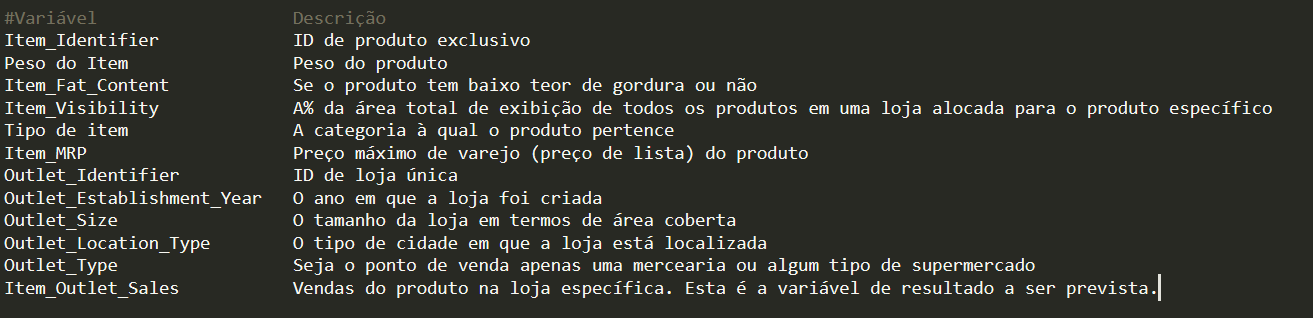

In [ ]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/AD.PNG")
im.show()
im 

In [2]:
# Instação do Algoritmo. Não está no sckit learn
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 84 kB/s 


In [3]:
#Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [4]:
#Read training and testing files
train = pd.read_csv("/content/treino_PrevisaoVendasProdutos_Big_Mart_Sales.csv")
test = pd.read_csv("/content/teste_PrevisaoVendasProdutos_Big_Mart_Sales.csv")

# 2°  Análise Exploratória

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


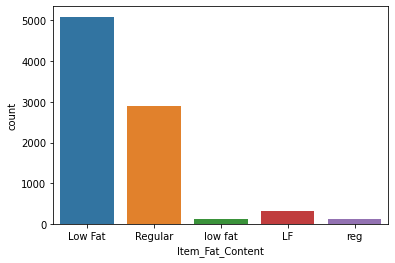

In [24]:
train.Item_Fat_Content.value_counts()
# Cria Visualização Gráfica
sns.countplot(train.Item_Fat_Content)

In [25]:
train.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


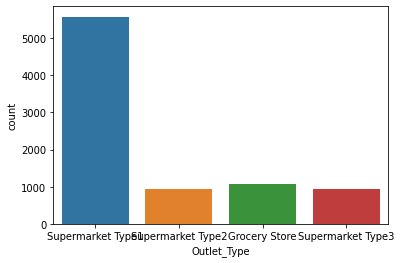

In [11]:
sns.countplot(train.Outlet_Type)

In [26]:
train.Outlet_Location_Type.value_counts() 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


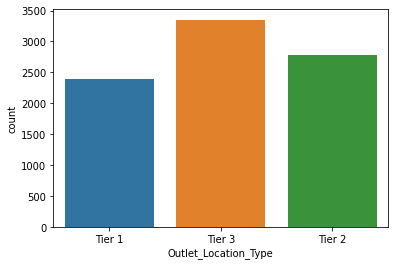

In [27]:
sns.countplot(train.Outlet_Location_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


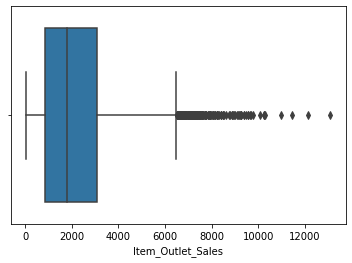

In [14]:
sns.boxplot(train.Item_Outlet_Sales,)

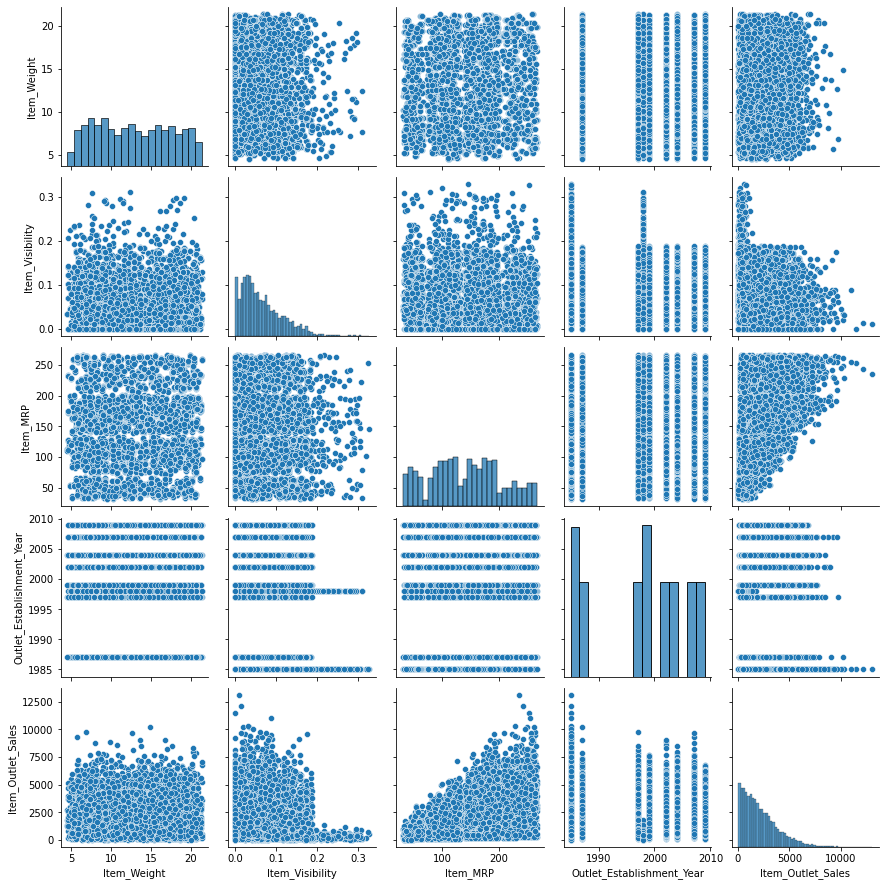

In [15]:
sns.pairplot(train)

In [16]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#3° Pré-Processamento dos Dados

Obs: não realizarei engenharia de recursos, apenas construirei um modelo básico

In [29]:
#Imputing missing values for both train and test
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

In [36]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = train.Item_Outlet_Sales


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)
#Criar indice das variáveis
categorical_features_indices = np.where(X.dtypes != np.float)[0]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [32]:
categorical_features_indices

array([ 0,  2,  4,  6,  7,  8,  9, 10])

# 4° Criação da Máquina Preditiva 

In [37]:
# Cria a Máquina Preditiva cujo RMSE é a métrica de Performance (erro quadrático médio para avaliar).
model  =  CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

# Treino e Teste da Máquina ao mesmo tempo
model.fit(X_train, y_train,  
          
          cat_features=categorical_features_indices,         # variáveis 

          eval_set=(X_test, y_test),plot=True)   # Eval_set = dados de teste (validação) e plot é para plotar o treinamento

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1620.1680376	test: 1635.6537958	best: 1635.6537958 (0)	total: 4.95ms	remaining: 242ms
1:	learn: 1549.5498543	test: 1567.6655130	best: 1567.6655130 (1)	total: 9.16ms	remaining: 220ms
2:	learn: 1488.8064780	test: 1506.5232208	best: 1506.5232208 (2)	total: 12.9ms	remaining: 202ms
3:	learn: 1435.5309961	test: 1456.5717400	best: 1456.5717400 (3)	total: 15.8ms	remaining: 182ms
4:	learn: 1390.0985572	test: 1411.7996854	best: 1411.7996854 (4)	total: 18.9ms	remaining: 170ms
5:	learn: 1350.2767051	test: 1373.4935581	best: 1373.4935581 (5)	total: 21.7ms	remaining: 159ms
6:	learn: 1315.8029758	test: 1339.2691549	best: 1339.2691549 (6)	total: 25.4ms	remaining: 156ms
7:	learn: 1285.3892250	test: 1310.3652215	best: 1310.3652215 (7)	total: 28.4ms	remaining: 149ms
8:	learn: 1261.0448409	test: 1286.9544433	best: 1286.9544433 (8)	total: 31.3ms	remaining: 143ms
9:	learn: 1238.3634073	test: 1264.4559800	best: 1264.4559800 (9)	total: 37.1ms	remaining: 148ms
10:	learn: 1216.8530466	test: 1245.39222

# 5° Avaliação da Máquina Preditiva

In [38]:
# Mostre a melhor Iteração
print(model.get_best_iteration())

49


# Competições de Machine Learning

In [42]:
# Script para submissão na Competição de ML. Vou enviar meus resultados, neste caso vou enviar os dados para
#avaliarem meus resultados. Será enviado o código do produto, o código da loja, e a previsão da minha venda deste produto na loja
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = model.predict(test)
submission


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1671.091828
1,FDW14,OUT017,1327.898521
2,NCN55,OUT010,778.697730
3,FDQ58,OUT017,2569.229524
4,FDY38,OUT027,5829.525057
...,...,...,...
5676,FDB58,OUT046,2119.085892
5677,FDD47,OUT018,2680.147630
5678,NCO17,OUT045,2005.535354
5679,FDJ26,OUT017,3433.881901


In [43]:
# exportação CSV
submission.to_csv("Submission.csv")